<a href="https://colab.research.google.com/github/AsmaMora/Customer_Analytics/blob/main/MADT8101_Churn_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Churn scoring

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
Ecomdata = 'https://github.com/AsmaMora/Customer_Analytics/raw/main/Data/E_Commerce_Dataset.xlsx'

In [ ]:
df = pd.read_excel(Ecomdata, sheet_name = "E Comm")

### Expore data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [ ]:
#check na.
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

### Clean data

In [ ]:
#drop na.
df = df.dropna(how='any',axis=0)

In [ ]:
df.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   3774 non-null   int64  
 1   Churn                        3774 non-null   int64  
 2   Tenure                       3774 non-null   float64
 3   PreferredLoginDevice         3774 non-null   object 
 4   CityTier                     3774 non-null   int64  
 5   WarehouseToHome              3774 non-null   float64
 6   PreferredPaymentMode         3774 non-null   object 
 7   Gender                       3774 non-null   object 
 8   HourSpendOnApp               3774 non-null   float64
 9   NumberOfDeviceRegistered     3774 non-null   int64  
 10  PreferedOrderCat             3774 non-null   object 
 11  SatisfactionScore            3774 non-null   int64  
 12  MaritalStatus                3774 non-null   object 
 13  NumberOfAddress   

### Create dummy

In [ ]:
#dummies

df_dummmies = pd.get_dummies(df[['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']])
df_dummmies

,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
5,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
11,0,1,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,1
12,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
5625,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5627,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
5628,1,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
#merge dummy
df = df.merge(df_dummmies, left_index=True, right_index=True, how='inner')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3774 entries, 0 to 5629
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CustomerID                             3774 non-null   int64  
 1   Churn                                  3774 non-null   int64  
 2   Tenure                                 3774 non-null   float64
 3   PreferredLoginDevice                   3774 non-null   object 
 4   CityTier                               3774 non-null   int64  
 5   WarehouseToHome                        3774 non-null   float64
 6   PreferredPaymentMode                   3774 non-null   object 
 7   Gender                                 3774 non-null   object 
 8   HourSpendOnApp                         3774 non-null   float64
 9   NumberOfDeviceRegistered               3774 non-null   int64  
 10  PreferedOrderCat                       3774 non-null   object 
 11  Sati

### Prepare data for ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [ ]:
#Create variable
X = df.drop(['CustomerID' , 'Churn','PreferredLoginDevice','PreferredPaymentMode','Gender', 'PreferedOrderCat','MaritalStatus'], axis=1)
y = df['Churn']

In [ ]:
#train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, stratify=y, random_state=42)

In [ ]:
#X variable scaling
scaler = StandardScaler()

x_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(x_scaled)
X_train_scaled.columns = X_train.columns

x_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(x_scaled)
X_test_scaled.columns = X_test.columns

### Classification Mode

In [ ]:
#classification model
def classification_model(clf, X_train, y_train, X_test, y_test, show_feature_importance=True):
  ls_y_hat_train = []
  ls_y_train = []

  clf_model = clf.fit(X_train, y_train)
  y_hat_train = clf_model.predict(X_train)
  ls_y_hat_train.extend(y_hat_train)
  ls_y_train.extend(y_train)
  report_train = classification_report(ls_y_train, ls_y_hat_train)
  ls_y_hat_test = []
  ls_y_test = []
  y_hat_test = clf_model.predict(X_test)
  ls_y_hat_test.extend(y_hat_test)
  ls_y_test.extend(y_test)
  report_test = classification_report(ls_y_test, ls_y_hat_test)

### Compare Model

In [ ]:
#compare parameter
from sklearn.metrics import classification_report

#Logistic Regression
logreg = LogisticRegression(solver='liblinear', class_weight='balanced')
classification_model(logreg, X_train_scaled, y_train, X_test_scaled, y_test)

#decision tree
dt_clf = DecisionTreeClassifier()
classification_model(dt_clf, X_train_scaled, y_train, X_test_scaled, y_test, show_feature_importance=True)

#Random forest
rf_clf = RandomForestClassifier(max_depth=4, random_state=0)
classification_model(rf_clf, X_train_scaled, y_train, X_test_scaled, y_test)

#KNN
knn_clf = KNeighborsClassifier(5)
classification_model(knn_clf, X_train_scaled, y_train, X_test_scaled, y_test)

#XGBoost
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc',
                              learning_rate =0.01,
                              n_estimators=100,
                              max_depth=3,
                              gamma=0.0,
                              colsample_bytree=0.6)
classification_model(xgb_clf, X_train_scaled, y_train, X_test_scaled, y_test)

classifiers = {
    "Logistic Regression": logreg,
    "Decision Tree": dt_clf,
    "Random Forest": rf_clf,
    "KNN": knn_clf,
    "XGBoost": xgb_clf
}

reports_train = {}
reports_test = {}

for clf_name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    train_predictions = clf.predict(X_train_scaled)
    test_predictions = clf.predict(X_test_scaled)
    report_train = classification_report(y_train, train_predictions)
    report_test = classification_report(y_test, test_predictions)
    reports_train[clf_name] = report_train
    reports_test[clf_name] = report_test

# Display the results in a table
print("{:<20} {:<20} {:<20}".format("Classifier", "Train Report", "Test Report"))
print("-" * 60)
for clf_name in classifiers.keys():
    train_report = reports_train[clf_name]
    test_report = reports_test[clf_name]
    print("{:<20} {:<20} {:<20}".format(clf_name, train_report, test_report))

Classifier           Train Report         Test Report         
------------------------------------------------------------
Logistic Regression                precision    recall  f1-score   support

           0       0.96      0.80      0.88      1885
           1       0.46      0.84      0.60       379

    accuracy                           0.81      2264
   macro avg       0.71      0.82      0.74      2264
weighted avg       0.88      0.81      0.83      2264
               precision    recall  f1-score   support

           0       0.96      0.82      0.88      1258
           1       0.47      0.81      0.60       252

    accuracy                           0.82      1510
   macro avg       0.71      0.82      0.74      1510
weighted avg       0.88      0.82      0.83      1510

Decision Tree                      precision    recall  f1-score   support

           0       1.00      1.00      1.00      1885
           1       1.00      1.00      1.00       379

    accuracy    

In [ ]:
#Confusion_matrix
from sklearn.metrics import confusion_matrix

clf_model = logreg.fit(X_train, y_train)
y_hat_train = clf_model.predict(X_train)

confusion_matrix(y_train, y_hat_train)

array([[1514,  371],
       [  59,  320]])

In [ ]:
# tn, fp, fn, tp

tn, fp, fn, tp = confusion_matrix(y_train, y_hat_train).ravel()

(tn, fp, fn, tp)

(1514, 371, 59, 320)

In [ ]:
# cal recall, precision, f1

from sklearn.metrics import recall_score, precision_score, f1_score

recall = recall_score(y_train, y_hat_train)
precision = precision_score(y_train, y_hat_train)
f1 = f1_score(y_train, y_hat_train)

print(f"recall : {recall}")
print(f"precision : {precision}")
print(f"f1 : {f1}")

recall : 0.8443271767810027
precision : 0.4630969609261939
f1 : 0.5981308411214954


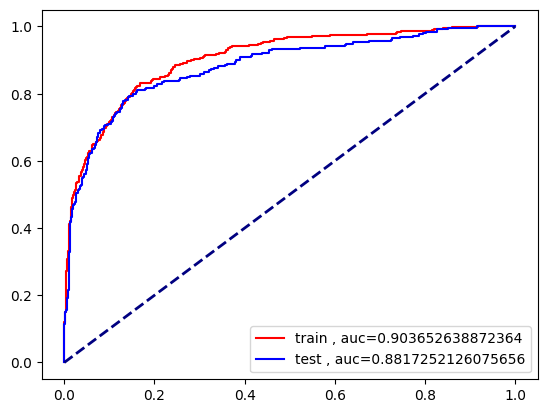

In [ ]:
#roc_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

clf_model = logreg.fit(X_train, y_train)
y_score_train = clf_model.predict_proba(X_train)
fpr_train, tpr_train, _ = roc_curve(y_train,  y_score_train[:,1])
auc_train = roc_auc_score(y_train, y_score_train[:,1])
plt.plot(fpr_train,tpr_train, color='red', label='train , auc='+str(auc_train))

y_score_test = clf_model.predict_proba(X_test)
fpr_test, tpr_test, _ = roc_curve(y_test,  y_score_test[:,1])
auc_test = roc_auc_score(y_test, y_score_test[:,1])
plt.plot(fpr_test,tpr_test, color='Blue', label='test , auc='+str(auc_test))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc=4)
plt.show()

### SMOTE

In [ ]:
#create SMOTE variable
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)

sm.fit(X_train_scaled, y_train)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train_scaled, y_train)

Compare model SMOTE

In [ ]:
#compare parameter SMOTE
from sklearn.metrics import classification_report

#Logistic Regression x SMOTE
logregs = LogisticRegression(solver='liblinear', class_weight='balanced')
classification_model(logregs, X_train_SMOTE, y_train_SMOTE, X_test_scaled, y_test)

#decision tree x SMOTE
dt_clfs = DecisionTreeClassifier()
classification_model(dt_clfs, X_train_SMOTE, y_train_SMOTE, X_test_scaled, y_test, show_feature_importance=True)

#Random forest x SMOTE
rf_clfs = RandomForestClassifier(max_depth=4, random_state=0)
classification_model(rf_clfs, X_train_SMOTE, y_train_SMOTE, X_test_scaled, y_test)

#KNN x SMOTE
knn_clfs = KNeighborsClassifier(5)
classification_model(knn_clfs, X_train_SMOTE, y_train_SMOTE, X_test_scaled, y_test)

#XGBoost x SMOTE
xgb_clfs = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc',
                              learning_rate =0.01,
                              n_estimators=100,
                              max_depth=3,
                              gamma=0.0,
                              colsample_bytree=0.6)
classification_model(xgb_clfs, X_train_scaled, y_train, X_test_scaled, y_test)

classifiers = {
    "Logistic Regression": logregs,
    "Decision Tree": dt_clfs,
    "Random Forest": rf_clfs,
    "KNN": knn_clfs,
    "XGBoost": xgb_clfs
}

reports_train = {}
reports_test = {}

for clf_name, clf in classifiers.items():
    clf.fit(X_train_SMOTE, y_train_SMOTE)
    train_predictions = clf.predict(X_train_SMOTE)
    test_predictions = clf.predict(X_test_scaled)
    report_train = classification_report(y_train_SMOTE, train_predictions)
    report_test = classification_report(y_test, test_predictions)
    reports_train[clf_name] = report_train
    reports_test[clf_name] = report_test

# Display the results in a table
print("{:<20} {:<20} {:<20}".format("Classifier", "Train Report", "Test Report"))
print("-" * 60)
for clf_name in classifiers.keys():
    train_report = reports_train[clf_name]
    test_report = reports_test[clf_name]
    print("{:<20} {:<20} {:<20}".format(clf_name, train_report, test_report))

Classifier           Train Report         Test Report         
------------------------------------------------------------
Logistic Regression                precision    recall  f1-score   support

           0       0.85      0.82      0.83      1885
           1       0.83      0.86      0.84      1885

    accuracy                           0.84      3770
   macro avg       0.84      0.84      0.84      3770
weighted avg       0.84      0.84      0.84      3770
               precision    recall  f1-score   support

           0       0.95      0.84      0.89      1258
           1       0.50      0.80      0.61       252

    accuracy                           0.83      1510
   macro avg       0.73      0.82      0.75      1510
weighted avg       0.88      0.83      0.85      1510

Decision Tree                      precision    recall  f1-score   support

           0       1.00      1.00      1.00      1885
           1       1.00      1.00      1.00      1885

    accuracy    

### Oversampling

In [ ]:
#create oversampling variable
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
ros.fit(X_train_scaled, y_train)
X_oversampled, y_oversampled = ros.fit_resample(X_train_scaled, y_train)

Compare model oversampling

In [ ]:
#compare parameter SMOTE
from sklearn.metrics import classification_report

#Logistic Regression x SMOTE
logrego = LogisticRegression(solver='liblinear', class_weight='balanced')
classification_model(logrego, X_oversampled, y_oversampled, X_test_scaled, y_test)

#decision tree x SMOTE
dt_clfo = DecisionTreeClassifier()
classification_model(dt_clfo, X_oversampled, y_oversampled, X_test_scaled, y_test, show_feature_importance=True)

#Random forest x SMOTE
rf_clfo = RandomForestClassifier(max_depth=4, random_state=0)
classification_model(rf_clfo, X_oversampled, y_oversampled, X_test_scaled, y_test)

#KNN x SMOTE
knn_clfo = KNeighborsClassifier(5)
classification_model(knn_clfo, X_oversampled, y_oversampled, X_test_scaled, y_test)

#XGBoost x SMOTE
xgb_clfo = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc',
                              learning_rate =0.01,
                              n_estimators=100,
                              max_depth=3,
                              gamma=0.0,
                              colsample_bytree=0.6)
classification_model(xgb_clfo, X_oversampled, y_oversampled, X_test_scaled, y_test)

classifiers = {
    "Logistic Regression": logrego,
    "Decision Tree": dt_clfo,
    "Random Forest": rf_clfo,
    "KNN": knn_clfo,
    "XGBoost": xgb_clfo
}

reports_train = {}
reports_test = {}

for clf_name, clf in classifiers.items():
    clf.fit(X_oversampled, y_oversampled)
    train_predictions = clf.predict(X_oversampled)
    test_predictions = clf.predict(X_test_scaled)
    report_train = classification_report(y_oversampled, train_predictions)
    report_test = classification_report(y_test, test_predictions)
    reports_train[clf_name] = report_train
    reports_test[clf_name] = report_test

# Display the results in a table
print("{:<20} {:<20} {:<20}".format("Classifier", "Train Report", "Test Report"))
print("-" * 60)
for clf_name in classifiers.keys():
    train_report = reports_train[clf_name]
    test_report = reports_test[clf_name]
    print("{:<20} {:<20} {:<20}".format(clf_name, train_report, test_report))

Classifier           Train Report         Test Report         
------------------------------------------------------------
Logistic Regression                precision    recall  f1-score   support

           0       0.83      0.81      0.82      1885
           1       0.81      0.84      0.83      1885

    accuracy                           0.82      3770
   macro avg       0.82      0.82      0.82      3770
weighted avg       0.82      0.82      0.82      3770
               precision    recall  f1-score   support

           0       0.96      0.83      0.89      1258
           1       0.48      0.82      0.61       252

    accuracy                           0.82      1510
   macro avg       0.72      0.82      0.75      1510
weighted avg       0.88      0.82      0.84      1510

Decision Tree                      precision    recall  f1-score   support

           0       1.00      1.00      1.00      1885
           1       1.00      1.00      1.00      1885

    accuracy    

### Undersampling

In [ ]:
#create undersampling variable
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
rus.fit(X_train_scaled, y_train)
X_undersampled, y_undersampled = rus.fit_resample(X_train_scaled, y_train)

Compare model undersampling

In [ ]:
#compare parameter SMOTE
from sklearn.metrics import classification_report

#Logistic Regression x SMOTE
logregu = LogisticRegression(solver='liblinear', class_weight='balanced')
classification_model(logregu, X_undersampled, y_undersampled, X_test_scaled, y_test)

#decision tree x SMOTE
dt_clfu = DecisionTreeClassifier()
classification_model(dt_clfu, X_undersampled, y_undersampled, X_test_scaled, y_test, show_feature_importance=True)

#Random forest x SMOTE
rf_clfu = RandomForestClassifier(max_depth=4, random_state=0)
classification_model(rf_clfu, X_undersampled, y_undersampled, X_test_scaled, y_test)

#KNN x SMOTE
knn_clfu = KNeighborsClassifier(5)
classification_model(knn_clfu, X_undersampled, y_undersampled, X_test_scaled, y_test)

#XGBoost x SMOTE
xgb_clfu = xgb.XGBClassifier(objective='binary:logistic', eval_metric='auc',
                              learning_rate =0.01,
                              n_estimators=100,
                              max_depth=3,
                              gamma=0.0,
                              colsample_bytree=0.6)
classification_model(xgb_clfu, X_undersampled, y_undersampled, X_test_scaled, y_test)

classifiers = {
    "Logistic Regression": logregu,
    "Decision Tree": dt_clfu,
    "Random Forest": rf_clfu,
    "KNN": knn_clfu,
    "XGBoost": xgb_clfu
}

reports_train = {}
reports_test = {}

for clf_name, clf in classifiers.items():
    clf.fit(X_undersampled, y_undersampled)
    train_predictions = clf.predict(X_undersampled)
    test_predictions = clf.predict(X_test_scaled)
    report_train = classification_report(y_undersampled, train_predictions)
    report_test = classification_report(y_test, test_predictions)
    reports_train[clf_name] = report_train
    reports_test[clf_name] = report_test

# Display the results in a table
print("{:<20} {:<20} {:<20}".format("Classifier", "Train Report", "Test Report"))
print("-" * 60)
for clf_name in classifiers.keys():
    train_report = reports_train[clf_name]
    test_report = reports_test[clf_name]
    print("{:<20} {:<20} {:<20}".format(clf_name, train_report, test_report))

Classifier           Train Report         Test Report         
------------------------------------------------------------
Logistic Regression                precision    recall  f1-score   support

           0       0.84      0.81      0.83       379
           1       0.82      0.85      0.83       379

    accuracy                           0.83       758
   macro avg       0.83      0.83      0.83       758
weighted avg       0.83      0.83      0.83       758
               precision    recall  f1-score   support

           0       0.96      0.81      0.88      1258
           1       0.46      0.83      0.60       252

    accuracy                           0.81      1510
   macro avg       0.71      0.82      0.74      1510
weighted avg       0.88      0.81      0.83      1510

Decision Tree                      precision    recall  f1-score   support

           0       1.00      1.00      1.00       379
           1       1.00      1.00      1.00       379

    accuracy    

### Show parameter coefficient and ROC curve

In [ ]:
# classification model
def classification_model(clf, X_train, y_train, X_test, y_test, show_feature_importance=True):
    clf_model = clf.fit(X_train, y_train)
    y_hat_train = clf_model.predict(X_train)
    report_train = classification_report(y_train, y_hat_train)

    y_hat_test = clf_model.predict(X_test)
    report_test = classification_report(y_test, y_hat_test)

    print('Training Set Classification Report:')
    print(report_train)
    print('\n')

    print('Test Set Classification Report:')
    print(report_test)
    print('\n')

    if show_feature_importance:
        try:
            print('Standardized Coeff.')
            print(pd.DataFrame({"Feature": X_train.columns.tolist(), "Coefficients": clf_model.coef_[0]}).to_string())
        except:
            try:
                print(pd.DataFrame({"Feature": X_train.columns.tolist(), "Coefficients": clf_model.feature_importances_}).to_string())
            except:
                print("No Standardized Coeff.")

    fpr_train, tpr_train, _ = roc_curve(y_train,  y_hat_train)
    auc_train = roc_auc_score(y_train, y_hat_train)
    plt.plot(fpr_train, tpr_train, color='red', label='train , auc=' + str(auc_train))

    fpr_test, tpr_test, _ = roc_curve(y_test,  y_hat_test)
    auc_test = roc_auc_score(y_test, y_hat_test)
    plt.plot(fpr_test, tpr_test, color='blue', label='test , auc=' + str(auc_test))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.legend(loc=4)
    plt.show()

Training Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.80      0.88      1885
           1       0.46      0.84      0.60       379

    accuracy                           0.81      2264
   macro avg       0.71      0.82      0.74      2264
weighted avg       0.88      0.81      0.83      2264



Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      1258
           1       0.47      0.81      0.60       252

    accuracy                           0.82      1510
   macro avg       0.71      0.82      0.74      1510
weighted avg       0.88      0.82      0.83      1510



Standardized Coeff.
                                  Feature  Coefficients
0                                  Tenure     -1.774863
1                                CityTier      0.239143
2                         WarehouseToHome      0.312000
3                          Hou

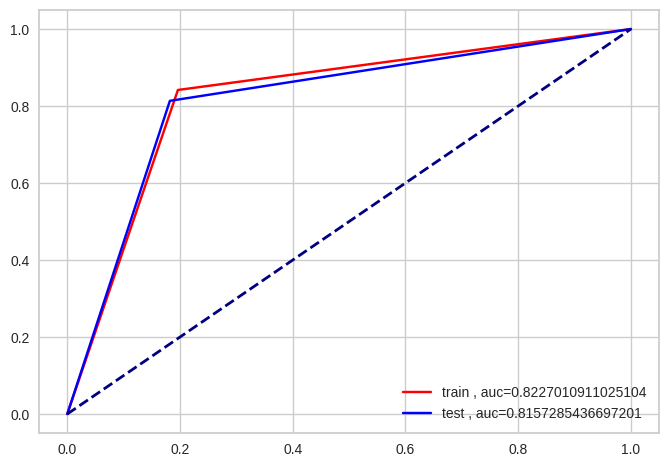

In [ ]:
#Show parameter , coeffician and ROC curve
#logistic regression
logreg = LogisticRegression(solver='liblinear', class_weight='balanced')

classification_model(logreg, X_train_scaled, y_train, X_test_scaled, y_test)

training set
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1885
           1       0.83      0.86      0.84      1885

    accuracy                           0.84      3770
   macro avg       0.84      0.84      0.84      3770
weighted avg       0.84      0.84      0.84      3770



test set
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      1258
           1       0.50      0.80      0.61       252

    accuracy                           0.83      1510
   macro avg       0.73      0.82      0.75      1510
weighted avg       0.88      0.83      0.85      1510



Standardized Coeff.
                                  Feature  Coefficients
0                                  Tenure     -2.094742
1                                CityTier      0.199209
2                         WarehouseToHome      0.322818
3                          HourSpendOnApp      0.067353
4                Num

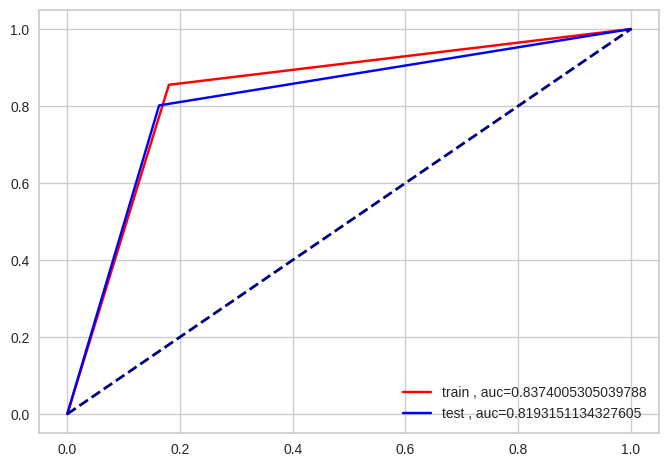

In [ ]:
#logistic regression x SMOTE
logregs = LogisticRegression(solver='liblinear', class_weight='balanced')

classification_model(logregs, X_train_SMOTE, y_train_SMOTE, X_test_scaled, y_test)

training set
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1885
           1       0.81      0.84      0.83      1885

    accuracy                           0.82      3770
   macro avg       0.82      0.82      0.82      3770
weighted avg       0.82      0.82      0.82      3770



test set
              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1258
           1       0.48      0.82      0.61       252

    accuracy                           0.82      1510
   macro avg       0.72      0.82      0.75      1510
weighted avg       0.88      0.82      0.84      1510



Standardized Coeff.
                                  Feature  Coefficients
0                                  Tenure     -1.837968
1                                CityTier      0.260122
2                         WarehouseToHome      0.309543
3                          HourSpendOnApp     -0.035427
4                Num

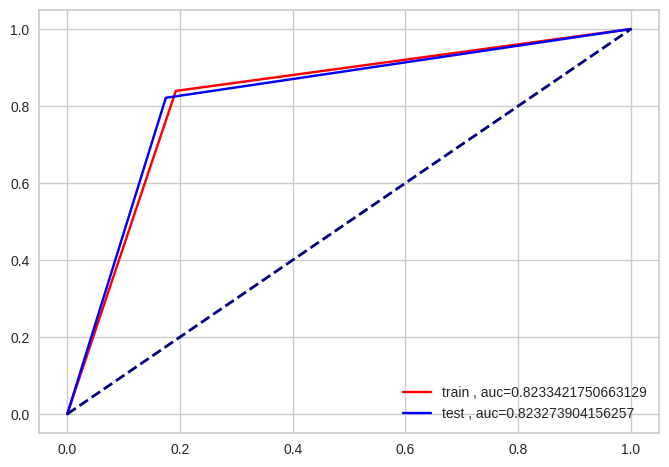

In [ ]:
#logistic regression x Oversampling
logrego = LogisticRegression(solver='liblinear', class_weight='balanced')

classification_model(logrego, X_oversampled, y_oversampled, X_test_scaled, y_test)

training set
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       379
           1       0.82      0.85      0.83       379

    accuracy                           0.83       758
   macro avg       0.83      0.83      0.83       758
weighted avg       0.83      0.83      0.83       758



test set
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1258
           1       0.46      0.83      0.60       252

    accuracy                           0.81      1510
   macro avg       0.71      0.82      0.74      1510
weighted avg       0.88      0.81      0.83      1510



Standardized Coeff.
                                  Feature  Coefficients
0                                  Tenure     -1.711972
1                                CityTier      0.312006
2                         WarehouseToHome      0.397024
3                          HourSpendOnApp     -0.014422
4                Num

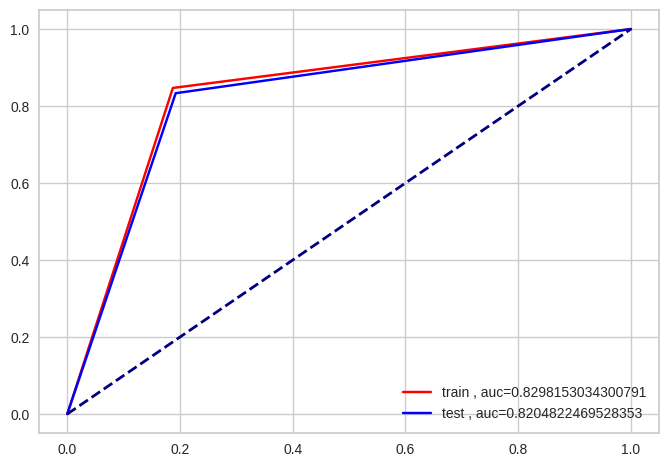

In [ ]:
#logistic regression x undersampling
logregu = LogisticRegression(solver='liblinear', class_weight='balanced')

classification_model(logregu, X_undersampled, y_undersampled, X_test_scaled, y_test)

In [ ]:
dt_clf = DecisionTreeClassifier()
classification_model(dt_clf, X_train_scaled, y_train, X_test_scaled, y_test, show_feature_importance=True)